# Importing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-price-prediction


In [8]:
df = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')

# Exploratory Data Analysis

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# Data Visualization

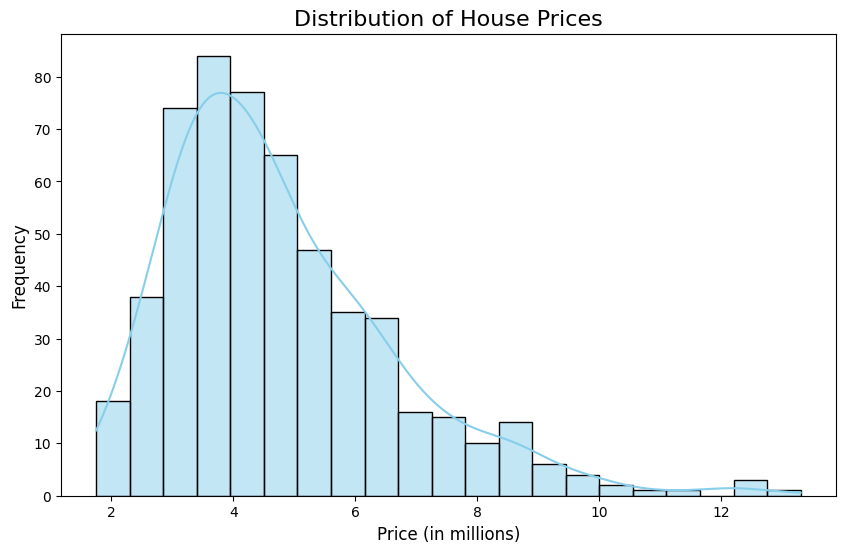

In [13]:
# Transfroming the price to millions for better readability
df['price_millions'] = df['price'] / 1e6

plt.figure(figsize=(10, 6))
sns.histplot(df['price_millions'], kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price (in millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

The histogram indicates a slightly right-skewed distribution of house prices. Most properties are concentrated in the price range of 3 to 5 million USD, representing the bulk of the market. However, a smaller number of high-end, luxury homes at significantly higher prices extend the tail to the right, creating the skew. This pattern is common in real estate markets, where mid-range homes dominate, and premium properties form a less frequent but notable segment.

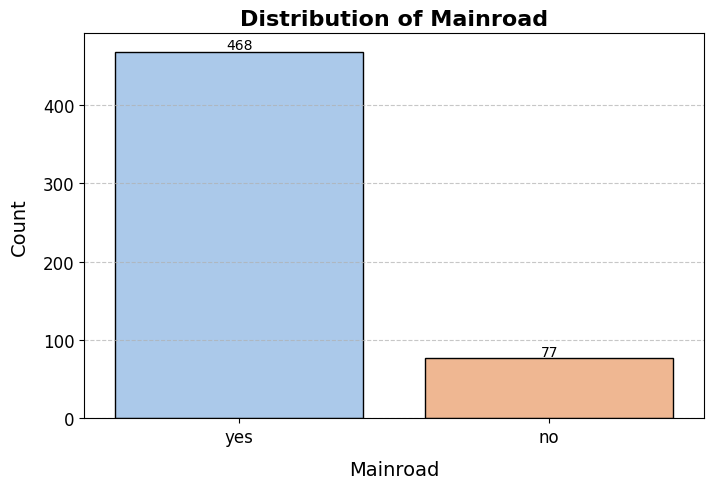

In [14]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['mainroad'], hue=df['mainroad'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Mainroad", fontsize=16, fontweight='bold')
plt.xlabel("Mainroad", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

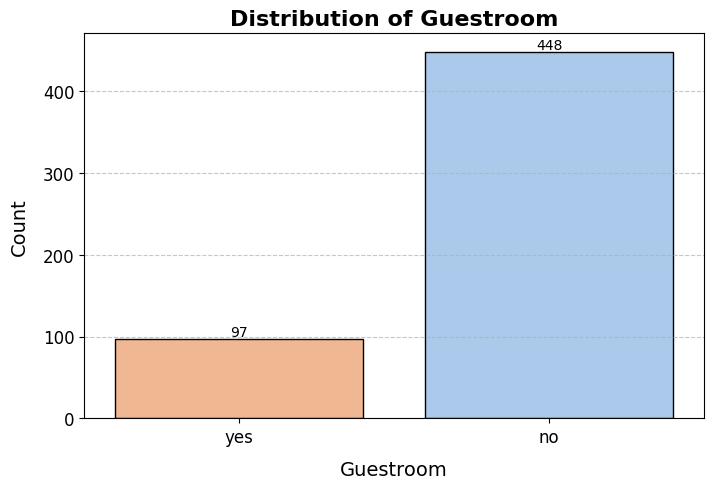

In [15]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['guestroom'], hue=df['guestroom'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Guestroom", fontsize=16, fontweight='bold')
plt.xlabel("Guestroom", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

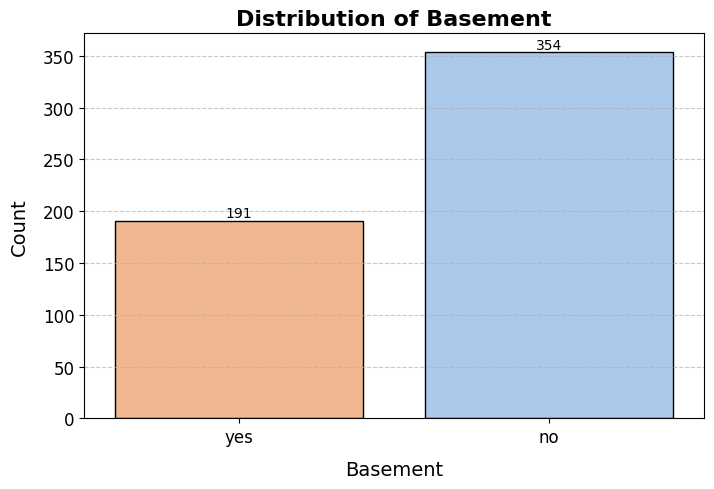

In [16]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['basement'], hue=df['basement'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Basement", fontsize=16, fontweight='bold')
plt.xlabel("Basement", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

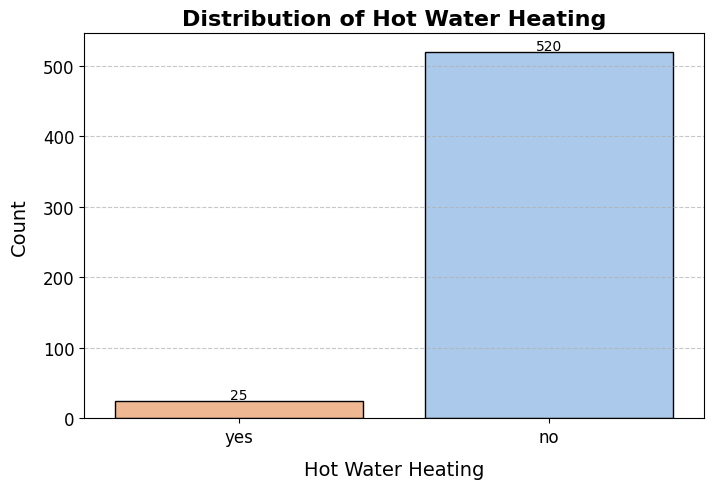

In [17]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['hotwaterheating'], hue=df['hotwaterheating'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Hot Water Heating", fontsize=16, fontweight='bold')
plt.xlabel("Hot Water Heating", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

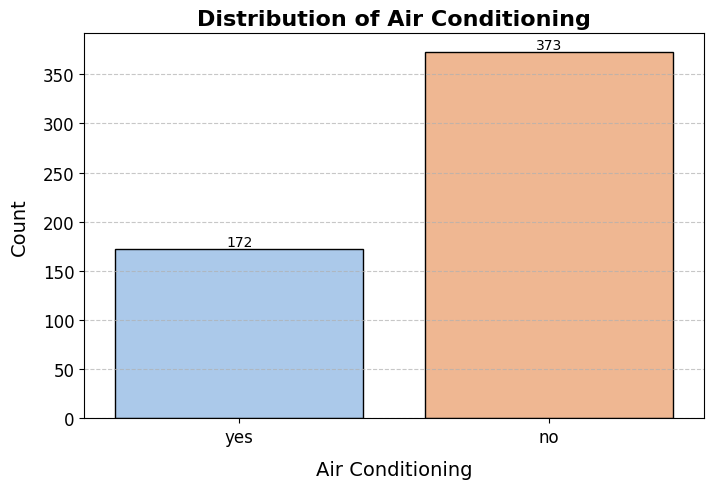

In [18]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['airconditioning'], hue=df['airconditioning'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Air Conditioning", fontsize=16, fontweight='bold')
plt.xlabel("Air Conditioning", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

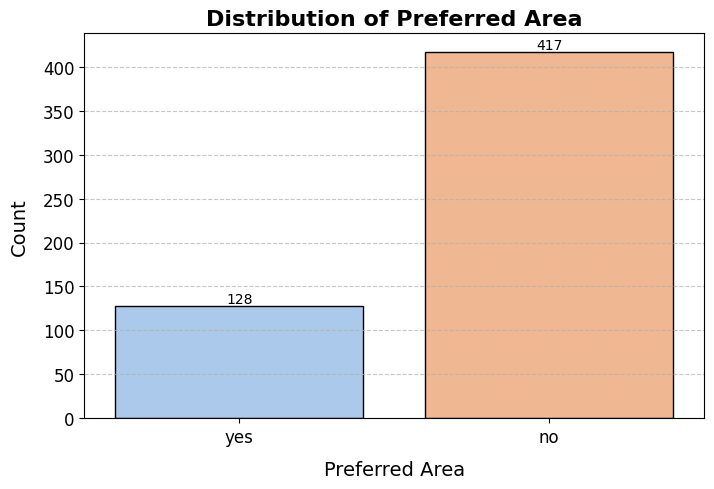

In [19]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['prefarea'], hue=df['prefarea'], palette='pastel', dodge=False, edgecolor='black', order=['yes', 'no'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Preferred Area", fontsize=16, fontweight='bold')
plt.xlabel("Preferred Area", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

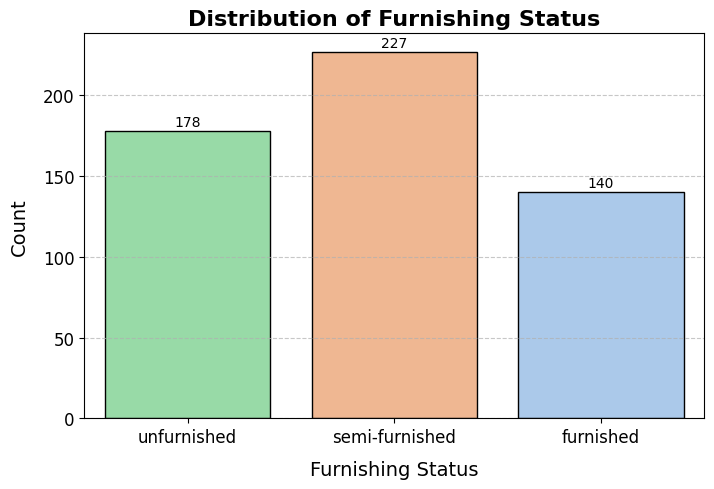

In [20]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['furnishingstatus'], hue=df['furnishingstatus'], palette='pastel', dodge=False, edgecolor='black', order=['unfurnished', 'semi-furnished', 'furnished'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Furnishing Status", fontsize=16, fontweight='bold')
plt.xlabel("Furnishing Status", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

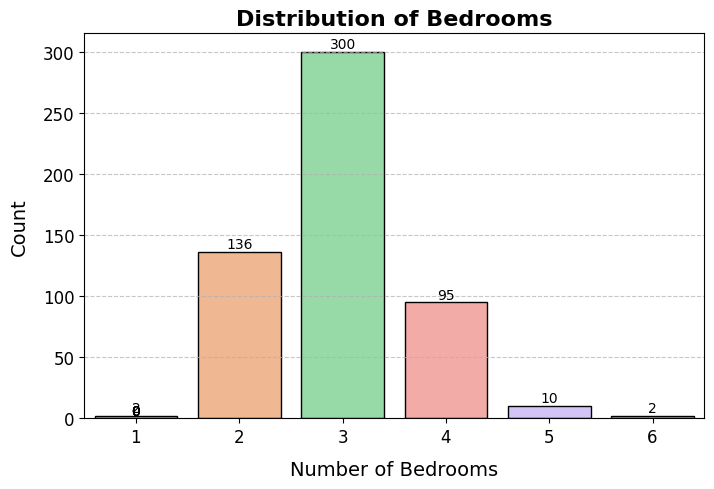

In [21]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['bedrooms'], hue=df['bedrooms'], palette='pastel', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

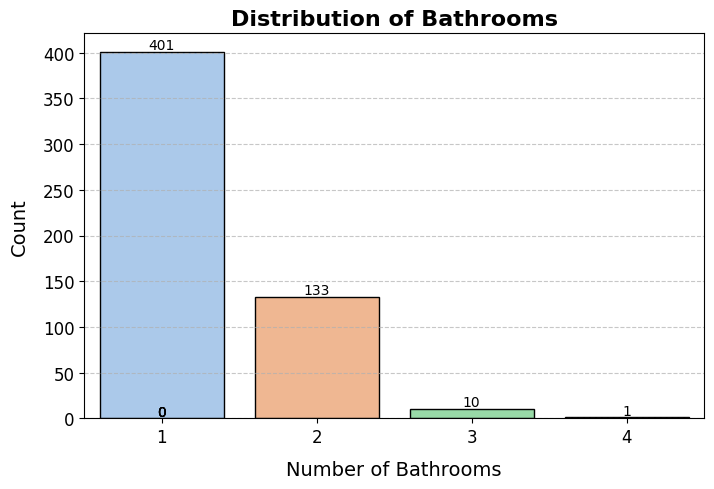

In [22]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['bathrooms'], hue=df['bathrooms'], palette='pastel', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Bathrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

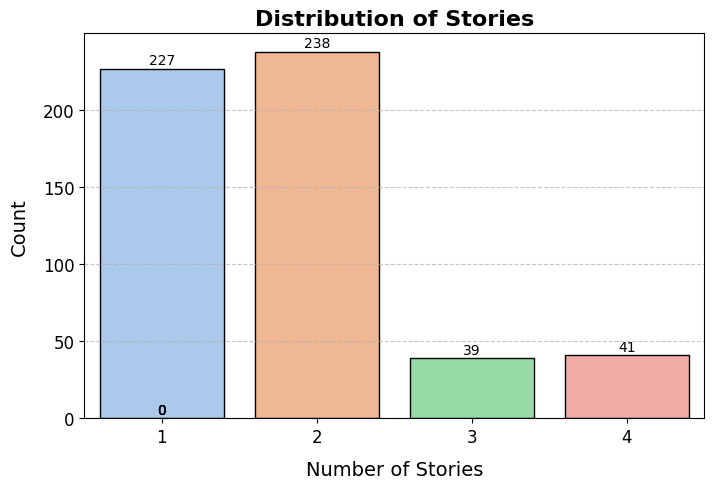

In [23]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['stories'], hue=df['stories'], palette='pastel', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Stories", fontsize=16, fontweight='bold')
plt.xlabel("Number of Stories", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

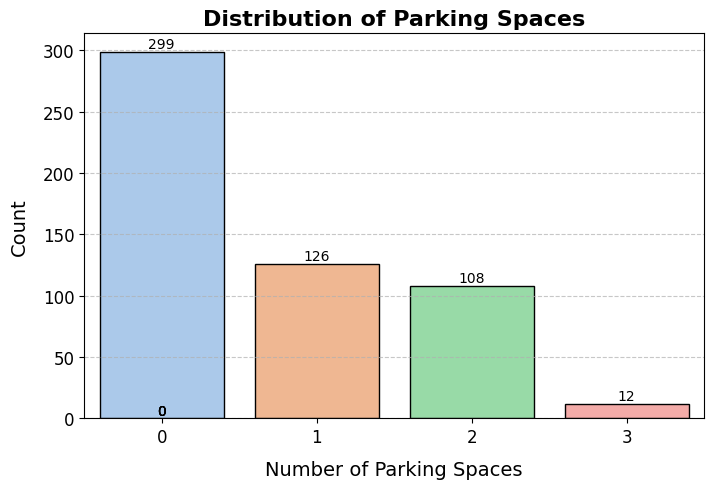

In [24]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['parking'], hue=df['parking'], palette='pastel', dodge=False, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 3),
                ha='center', fontsize=10)

plt.title("Distribution of Parking Spaces", fontsize=16, fontweight='bold')
plt.xlabel("Number of Parking Spaces", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

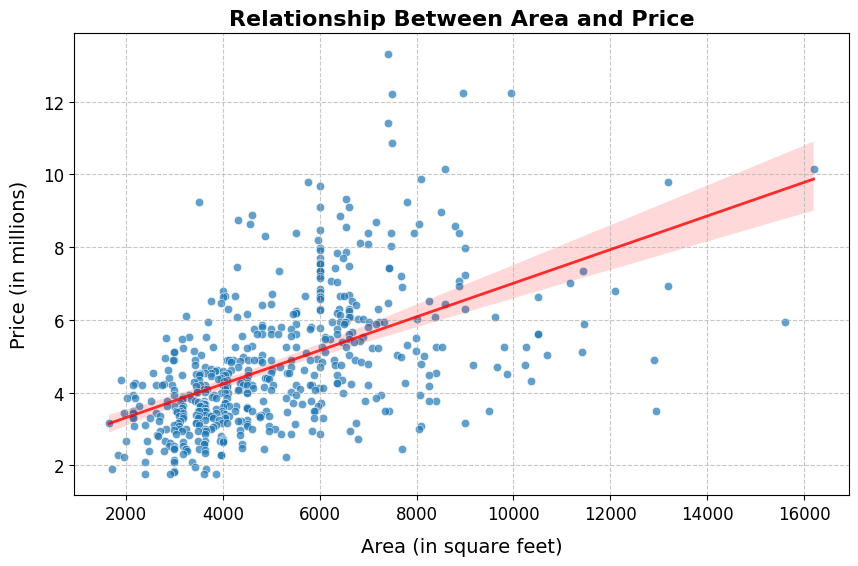

In [25]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['area'], y=df['price_millions'], alpha=0.7, edgecolor='w')

sns.regplot(x=df['area'], y=df['price_millions'], scatter=False, color='red', line_kws={'linewidth': 2, 'alpha': 0.8})

plt.title("Relationship Between Area and Price", fontsize=16, fontweight='bold')
plt.xlabel("Area (in square feet)", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

The scatter plot depicts the relationship between house prices and area, revealing a clear positive correlation—larger homes tend to have higher prices. This upward trend is represented by the red regression line.

Most properties are concentrated within the 2,000 to 7,000 square feet range, indicating that this is the typical size for houses in the dataset. A few outliers are noticeable, such as smaller homes with unusually high prices or larger homes with relatively lower prices, which could be attributed to unique features or specific market factors.

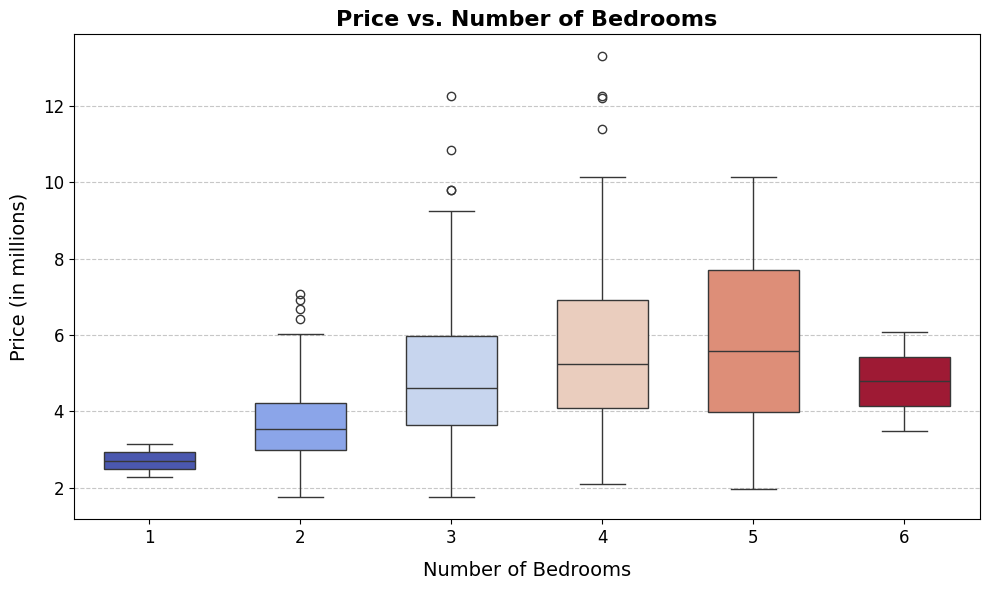

In [26]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['bedrooms'], y=df['price_millions'], hue=df['bedrooms'], dodge=False, width=0.6, palette='coolwarm')

plt.title("Price vs. Number of Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The boxplot illustrates how house prices vary with the number of bedrooms. Generally, there is a positive trend in median price from 1 to 5 bedrooms, indicating that homes with more bedrooms tend to be more expensive. Interestingly, the median price slightly decreases for 6-bedroom houses, suggesting that larger size doesn’t always guarantee a higher market value.

Homes with 5 bedrooms display the widest interquartile range (IQR), pointing to significant variation in prices within this group. Additionally, there are several high-value outliers in the 3, 4, and 5-bedroom categories, which likely represent premium or luxury properties.

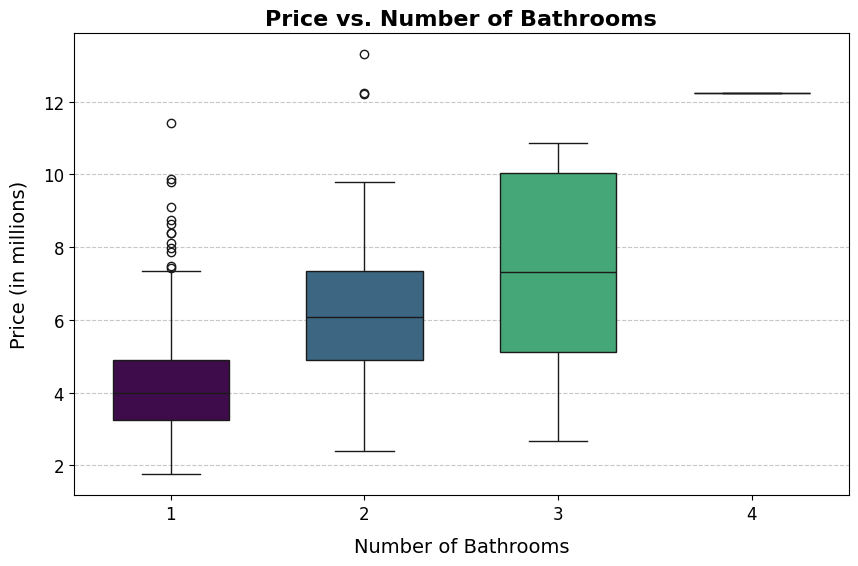

In [27]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['bathrooms'], y=df['price_millions'], hue=df['bathrooms'], dodge=False, width=0.6, palette='viridis')

plt.title("Price vs. Number of Bathrooms", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The boxplot shows that houses with 3 bathrooms have the highest median price and the greatest price variability, as indicated by the wide IQR. While 4-bathroom homes appear most expensive, the category includes only one property, making it less reliable.

1-bathroom houses show many high-price outliers, likely due to their large sample size and the presence of some luxury homes in this group.

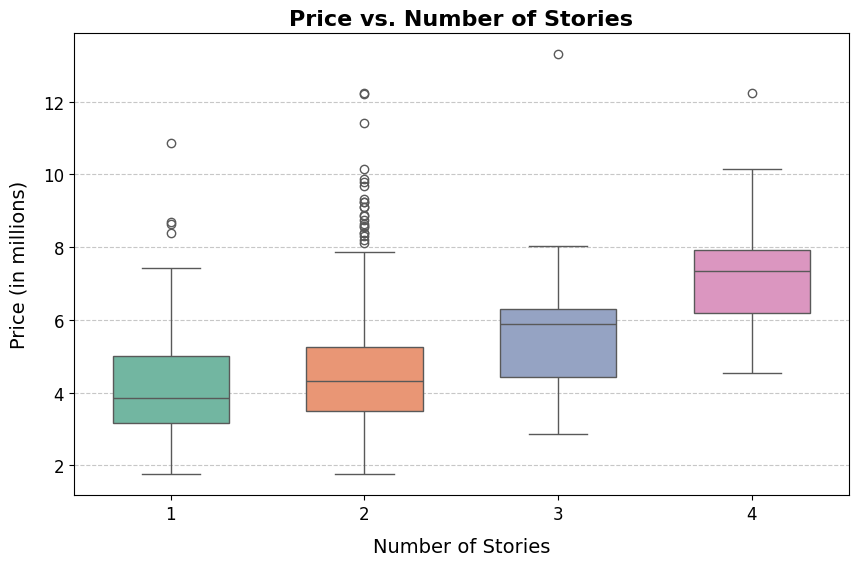

In [28]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['stories'], y=df['price_millions'], hue=df['stories'], dodge=False, width=0.6, palette='Set2')

plt.title("Price vs. Number of Stories", fontsize=16, fontweight='bold')
plt.xlabel("Number of Stories", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The boxplot shows how house prices vary based on the number of stories. As the number of stories increases from 1 to 4, the median price also rises consistently, reflecting a positive relationship between the two variables.

The interquartile ranges (IQRs) are roughly similar across all story categories, indicating that price variability remains relatively stable regardless of the number of stories. However, 2-story houses stand out due to numerous high-priced outliers, which may correspond to premium or luxury properties in this segment.

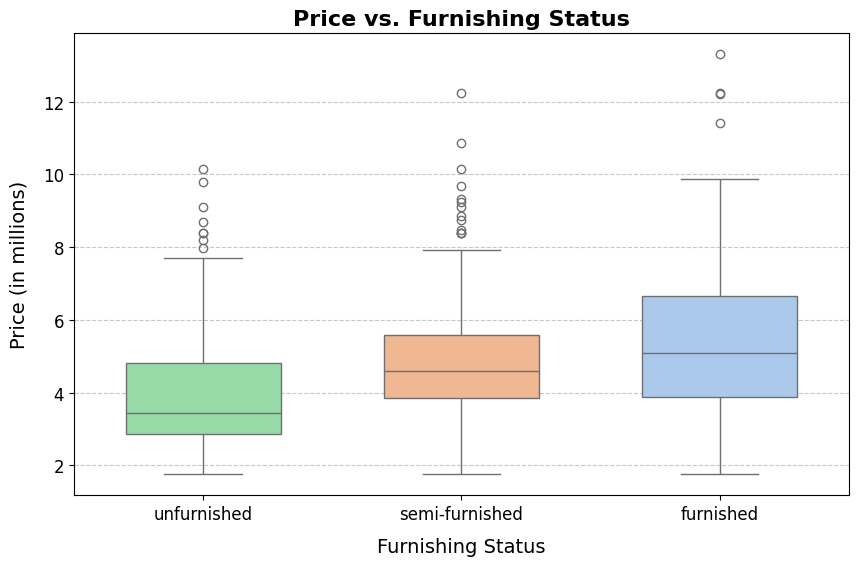

In [29]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x=df['furnishingstatus'],
    y=df['price_millions'],
    hue=df['furnishingstatus'],
    dodge=False,
    width=0.6,
    palette='pastel',
    order=['unfurnished', 'semi-furnished', 'furnished']
)

plt.title("Price vs. Furnishing Status", fontsize=16, fontweight='bold')
plt.xlabel("Furnishing Status", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.legend([], [], frameon=False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The boxplot depicts the distribution of house prices based on furnishing status. Furnished houses have the highest median price, suggesting that fully furnished properties generally command a higher market value. This category also shows the widest interquartile range (IQR), indicating greater price variability compared to unfurnished or semi-furnished homes.

Outliers are present across all categories but vary in frequency. Semi-furnished houses have the most outliers, particularly on the higher end, which could represent upscale or uniquely priced properties. In contrast, furnished homes exhibit the fewest outliers, implying more consistent pricing within this segment.

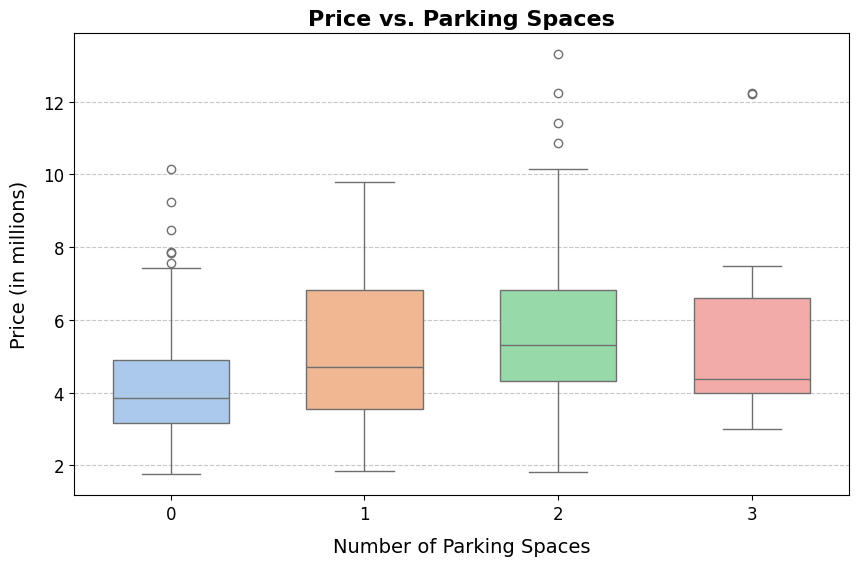

In [30]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x=df['parking'],
    y=df['price_millions'],
    hue=df['parking'],
    dodge=False,
    width=0.6,
    palette='pastel'
)

plt.title("Price vs. Parking Spaces", fontsize=16, fontweight='bold')
plt.xlabel("Number of Parking Spaces", fontsize=14, labelpad=10)
plt.ylabel("Price (in millions)", fontsize=14, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend([], [], frameon=False)

plt.show()

The boxplot highlights the relationship between house prices and the number of parking spaces. Homes with 0 parking spaces have the lowest median price, while those with 2 spaces have the highest, suggesting that more parking may contribute to higher property value.

Properties with 1 parking space show the widest interquartile range (IQR), indicating greater price variation. Outliers are present in the upper price range for houses with 0, 2, and 3 parking spaces, with 3-space homes having extreme outliers, possibly reflecting luxury or premium properties.

# Data Preprocessing

In [31]:
encoder = LabelEncoder()

encoding_col = ['furnishingstatus', 'prefarea', 'airconditioning',
                'hotwaterheating', 'basement', 'guestroom', 'mainroad']

for col in encoding_col:
  df[col] = encoder.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_millions
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,13.300
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,12.250
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,12.250
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,12.215
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,11.410


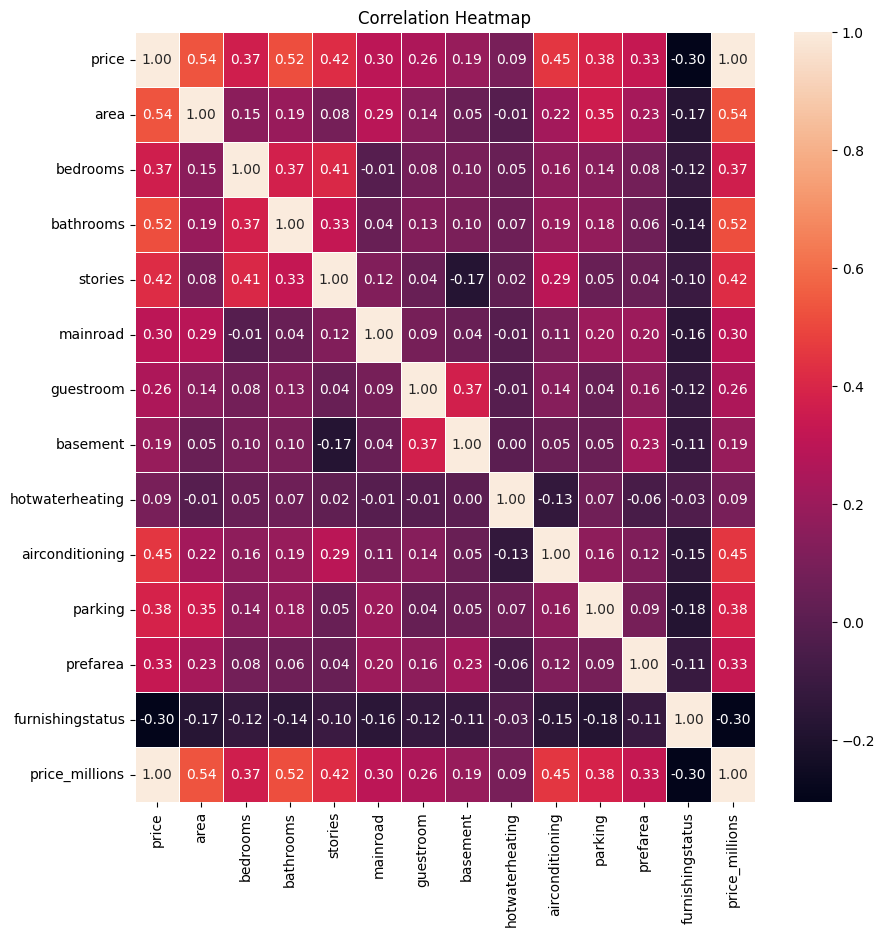

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=0.5, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap reveals that house prices are most strongly influenced by area (0.54), bathrooms (0.52), and air conditioning (0.45), with parking (0.38) and stories (0.42) also playing moderate roles. Weak correlations exist for features like basement (0.19) and hot water heating (0.09), while furnishing status (-0.30) shows a slight negative relationship with price. Notably, bedrooms correlate more with bathrooms (0.37) than directly with price (0.37), and price and price millions are perfectly redundant (1.00). These insights suggest focusing on area, bathrooms, and amenities like air conditioning for pricing models.

In [33]:
# Dropping 'price' since we are using 'price_millions'
df = df.drop(columns=['price'], axis=1)

X = df.drop(columns=['price_millions'], axis=1)
y = df['price_millions']

In [34]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Machine Learning Models

**Linear Regression**

In [36]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = ln_model.predict(X_test)

ln_r2 = r2_score(y_test, y_pred)
ln_mae = mean_absolute_error(y_test, y_pred)
ln_mse = mean_squared_error(y_test, y_pred)
ln_rmse = np.sqrt(ln_mse)

print("Linear Regression Metrics:")
print("R2 Score:", ln_r2)
print("Mean Absolute Error (MAE):", ln_mae)
print("Mean Squared Error (MSE):", ln_mse)
print("Roor Mean Squared Error (RMSE):", ln_rmse)

Linear Regression Metrics:
R2 Score: 0.7624579467323475
Mean Absolute Error (MAE): 0.06332171625253742
Mean Squared Error (MSE): 0.006055724882518719
Roor Mean Squared Error (RMSE): 0.07781853816744902


**Decision Tree Regressor**

In [38]:
dt_model = DecisionTreeRegressor(random_state=50)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=50)

In [39]:
y_pred = dt_model.predict(X_test)

dt_r2 = r2_score(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(ln_mse)

print("Decision Tree Metrics:")
print("R2 Score:", dt_r2)
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)
print("Roor Mean Squared Error (RMSE):", dt_rmse)

Decision Tree Metrics:
R2 Score: 0.1412462288809122
Mean Absolute Error (MAE): 0.10237125382262995
Mean Squared Error (MSE): 0.021892446024549074
Roor Mean Squared Error (RMSE): 0.07781853816744902


**Random Forest Regressor**

In [41]:
# Hyper tuning the model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=50),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train.ravel())

best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [42]:
y_pred = best_rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

print("\nTuned Random Forest Metrics:")
print("R² Score:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)


Tuned Random Forest Metrics:
R² Score: 0.7628213895301503
Mean Absolute Error (MAE): 0.059916491750630685
Mean Squared Error (MSE): 0.006046459535335974
Root Mean Squared Error (RMSE): 0.07775898363106333


**Gradient Boosting Regressor**

In [44]:
# Hyper tuning the model
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator = GradientBoostingRegressor(random_state=50),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=50,
    n_jobs=-1
)

random_search.fit(X_train, y_train.ravel())

best_gb_model = random_search.best_estimator_
print("Best Hyperparameters for Gradient Boosting:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Gradient Boosting: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.01}


In [45]:
y_pred = best_gb_model.predict(X_test)

gb_r2 = r2_score(y_test, y_pred)
gb_mae = mean_absolute_error(y_test, y_pred)
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)

print("Optimised Gradient Boosting Metrics:")
print("R² Score:", gb_r2)
print("Mean Absolute Error (MAE):", gb_mae)
print("Mean Squared Error (MSE):", gb_mse)
print("Root Mean Squared Error (RMSE):", gb_rmse)

Optimised Gradient Boosting Metrics:
R² Score: 0.754950140906352
Mean Absolute Error (MAE): 0.060279670110666844
Mean Squared Error (MSE): 0.006247123440913644
Root Mean Squared Error (RMSE): 0.0790387464533291


**Support Vector Regression**

In [46]:
# Hyper tuning the model
param_distributions = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.001, 0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}

random_search = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=50,
    n_jobs=-1
)

random_search.fit(X_train, y_train.ravel())

best_svr_model = random_search.best_estimator_
print("Best Hyperparameters for SVR:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for SVR: {'kernel': 'linear', 'gamma': 0.01, 'epsilon': 0.001, 'C': 1000}


In [48]:
y_pred = best_svr_model.predict(X_test)

svr_r2 = r2_score(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)

print("Optimised Support Vector Regressor Metrics:")
print("R² Score:", svr_r2)
print("Mean Absolute Error (MAE):", svr_mae)
print("Mean Squared Error (MSE):", svr_mse)
print("Root Mean Squared Error (RMSE):", svr_rmse)

Optimised Support Vector Regressor Metrics:
R² Score: 0.746706724160157
Mean Absolute Error (MAE): 0.06345326969854449
Mean Squared Error (MSE): 0.006457275130773193
Root Mean Squared Error (RMSE): 0.08035717224226592


# Evaluation


Our comprehensive evaluation of machine learning models for housing price prediction yielded valuable insights into their effectiveness. We assessed each model using key metrics including R² Score, MAE, MSE, and RMSE to determine their predictive accuracy and reliability.

The hyperparameter-tuned Random Forest Regressor emerged as the clear leader, achieving the highest R² Score of 0.763 and lowest error metrics (RMSE: 0.0778, MAE: 0.0599). Its robust performance demonstrates an excellent ability to capture complex patterns while maintaining generalization, making it our strongest candidate for this prediction task.

The optimized Gradient Boosting Regressor delivered competitive results with an R² Score of 0.755 and low error rates (RMSE: 0.0790, MAE: 0.0603). While slightly less accurate than Random Forest, its iterative approach to error correction makes it a powerful alternative, particularly for capturing non-linear relationships in the data.

Interestingly, the simple Linear Regression model performed remarkably well as a baseline, achieving an R² Score of 0.762 and MAE of 0.0633. These results suggest that linear relationships explain a significant portion of the variance in housing prices, though more complex models may capture additional subtle patterns.

The Support Vector Regressor (SVR) produced respectable outcomes (R²: 0.747, RMSE: 0.0804), demonstrating its capability to handle non-linear data relationships. While not the top performer, SVR remains a viable option for certain data characteristics, particularly when dealing with potential outliers.

The basic Decision Tree Regressor showed poor performance with an R² Score of just 0.141 and high errors (RMSE: 0.148, MAE: 0.102). These results clearly indicate its inability to generalize effectively to unseen data without significant parameter tuning or constraints to prevent overfitting.

Our analysis underscores the importance of model comparison and hyperparameter optimization. For this housing price prediction task, Random Forest stands out as the optimal choice, with Gradient Boosting as a strong alternative. The performance hierarchy suggests that while complex models can offer superior accuracy, simpler approaches like Linear Regression can sometimes provide surprisingly effective baseline results.